In [1]:
#pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.3/236.3 MB 40.8 MB/s eta 0:00:0000:0100:01
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 26.8 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 30.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 31.8 MB/s eta 0:00:00
Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)
Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)
No

## Imports

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.model_selection import train_test_split
from scipy.sparse import coo_matrix, csr_matrix
from scipy.spatial.distance import jaccard, cosine 
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

[CV] END bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   4.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.9s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.7s
[CV] END bootstrap=False, max_depth=20, min_samples_le

## Import UC Wine Data

In [24]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

## Analyze the Data

In this stage of the process, I am going to do a little analysis of the data. I will look at what feature types we have, the variation in the values of each feature and how important each feature is to predict the overall quaity of the wine.

### Verfify the data loaded

In [25]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [26]:
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


## Check variations of values

In [27]:
# Printing the min, max, and standard deviation for each column
print("Min values:\n", X.min())
print("\nMax values:\n", X.max())
print("\nStandard deviation values:\n", X.std())

Min values:
 fixed_acidity           3.80000
volatile_acidity        0.08000
citric_acid             0.00000
residual_sugar          0.60000
chlorides               0.00900
free_sulfur_dioxide     1.00000
total_sulfur_dioxide    6.00000
density                 0.98711
pH                      2.72000
sulphates               0.22000
alcohol                 8.00000
dtype: float64

Max values:
 fixed_acidity            15.90000
volatile_acidity          1.58000
citric_acid               1.66000
residual_sugar           65.80000
chlorides                 0.61100
free_sulfur_dioxide     289.00000
total_sulfur_dioxide    440.00000
density                   1.03898
pH                        4.01000
sulphates                 2.00000
alcohol                  14.90000
dtype: float64

Standard deviation values:
 fixed_acidity            1.296434
volatile_acidity         0.164636
citric_acid              0.145318
residual_sugar           4.757804
chlorides                0.035034
free_sulfur_dioxid

In [28]:
# Printing the min, max, and standard deviation for each column
print("Min values:\n", y.min())
print("\nMax values:\n", y.max())
print("\nStandard deviation values:\n", y.std())

Min values:
 quality    3
dtype: int64

Max values:
 quality    9
dtype: int64

Standard deviation values:
 quality    0.873255
dtype: float64


## Check Feature Importance

In [29]:
rf = RandomForestClassifier(random_state=42)

# Fit the model to the data
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


                 Feature  Importance
10               alcohol    0.123697
7                density    0.103130
1       volatile_acidity    0.100264
6   total_sulfur_dioxide    0.091147
4              chlorides    0.088163
5    free_sulfur_dioxide    0.086409
9              sulphates    0.085726
3         residual_sugar    0.084419
8                     pH    0.083949
2            citric_acid    0.078167
0          fixed_acidity    0.074927


## Visualize Feature Importance for each feature

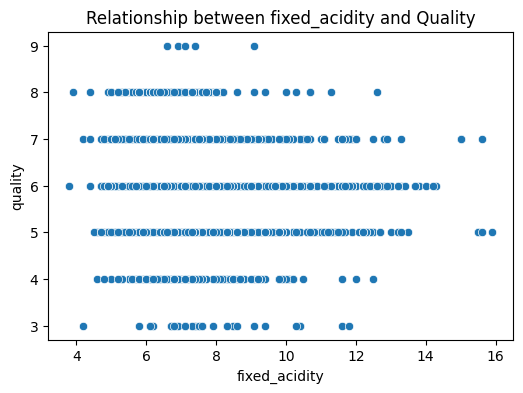

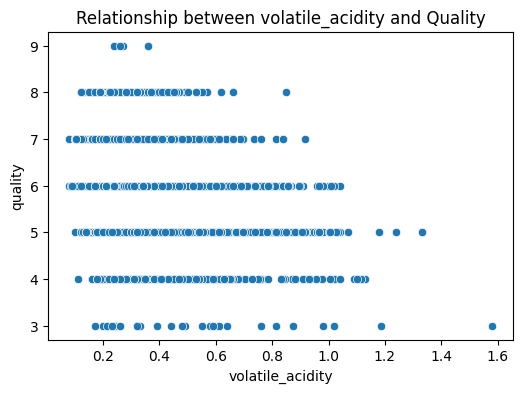

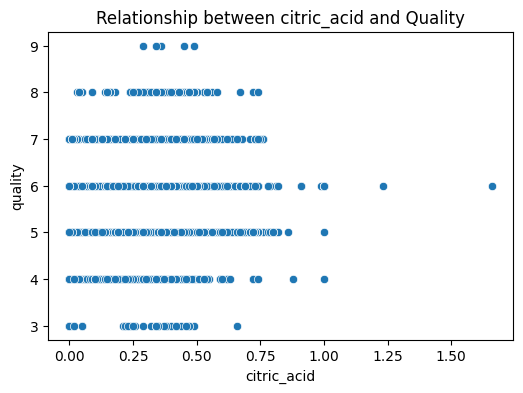

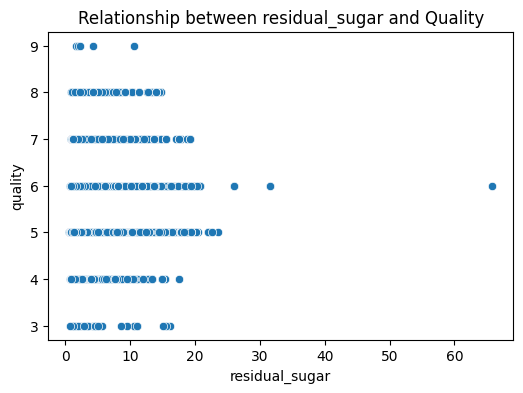

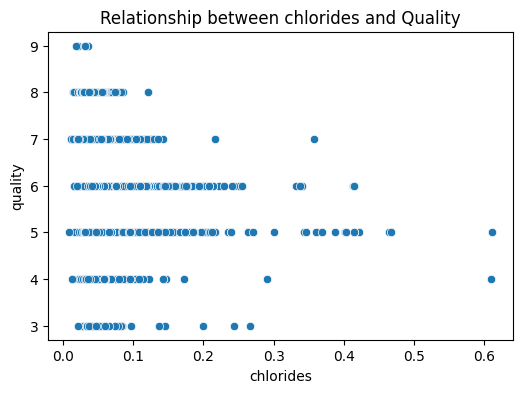

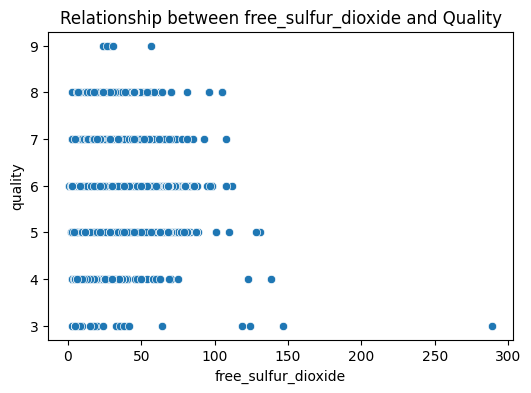

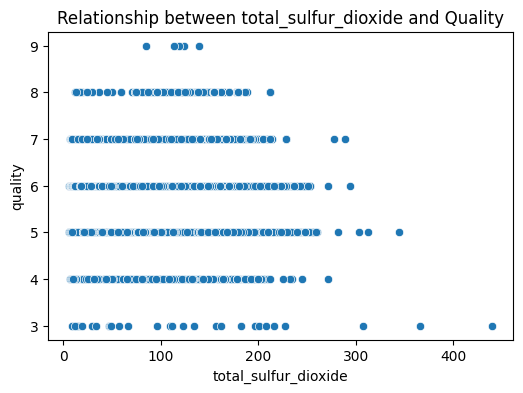

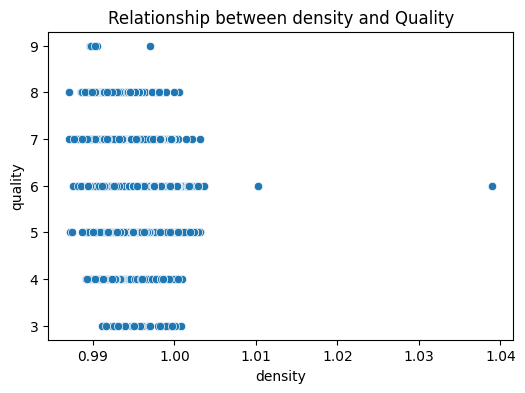

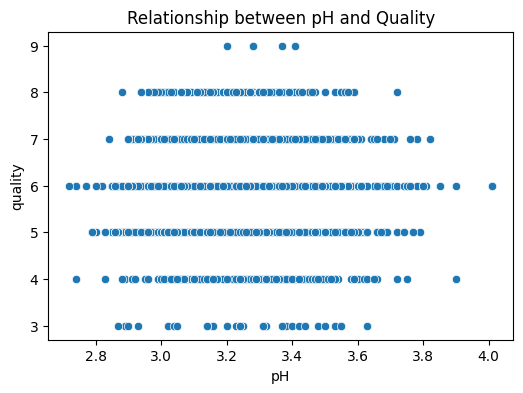

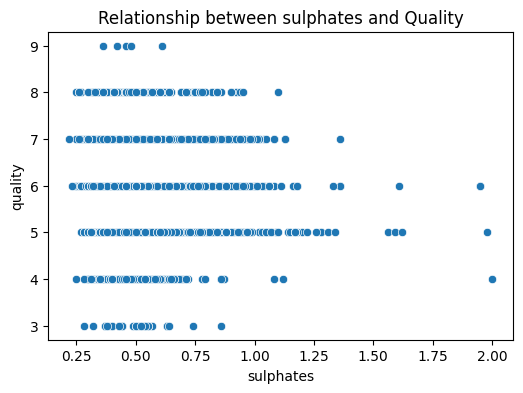

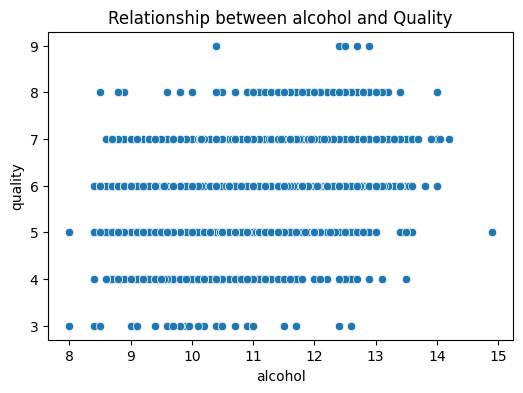

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of alcohol vs quality
for column in df.columns:
    if column == 'quality':
        break
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X[column], y=y["quality"])
    plt.title(f"Relationship between {column} and Quality")
    plt.show()

# Begin Model Training

## Pre-processing

In [33]:
df = pd.concat([X, y], axis=1)

train, test = train_test_split(df, test_size=0.2, random_state=42)

# Separate the features and target labels for train and test sets
X_train = train.iloc[:, :-1]  
y_train = train.iloc[:, -1]   
X_test = test.iloc[:, :-1]    
y_test = test.iloc[:, -1]     

print("Training and testing sets created successfully!")

Training and testing sets created successfully!


In [35]:
#Verify Data
len(X_train)

5197

In [36]:
len(y_train)

5197

In [38]:
len(X_test)

1300

In [39]:
len(y_test)

1300

## Simple Model Training with All features

In [42]:
# Train Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Train Support Vector Machine
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("\nSVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# Train K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("\nK-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/metrics/_clas

Logistic Regression Accuracy: 0.5292307692307693
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        43
           5       0.54      0.60      0.57       402
           6       0.53      0.70      0.60       597
           7       0.48      0.13      0.20       215
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         1

    accuracy                           0.53      1300
   macro avg       0.22      0.20      0.20      1300
weighted avg       0.49      0.53      0.49      1300


Random Forest Accuracy: 0.6730769230769231
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.71      0.12      0.20        43
           5       0.67      0.71      0.69       402
           6       0.66      0.76      0.71  

/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf


SVM Accuracy: 0.45153846153846156
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        43
           5       0.38      0.16      0.23       402
           6       0.46      0.87      0.60       597
           7       0.00      0.00      0.00       215
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         1

    accuracy                           0.45      1300
   macro avg       0.12      0.15      0.12      1300
weighted avg       0.33      0.45      0.35      1300


K-Nearest Neighbors Accuracy: 0.45384615384615384
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.11      0.07      0.08        43
           5       0.43      0.53      0.48       402
           6       0.50      0.53      0.51       59

/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

## Intitial Analysis

The Random Forest had the best performance with no feature engineering or hyper-paramter tuning, so I am going to move forawrd with that model as my supervised learning approach. Now I will see how it performs with the top feature, top-2 features, top-3 features and so on, to get an idea of the baseline performance and the important features

In [122]:
# Feature importance list (already sorted)
feature_importance_order = ['alcohol', 'density', 'volatile_acidity', 'total_sulfur_dioxide', 
                            'chlorides', 'free_sulfur_dioxide', 'sulphates', 
                            'residual_sugar', 'pH', 'citric_acid', 'fixed_acidity']

# Initialize list to store accuracy results
accuracy_results = []

# Iterate from using 1 feature to using all features
for i in range(1, len(feature_importance_order) + 1):
    # Select the top i most important features
    selected_features = feature_importance_order[:i]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)
    
    # Train a Random Forest model
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = rf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the result
    accuracy_results.append((i, accuracy))
    
    # Print the result for each step
    print(f'Top {i} feature(s): {selected_features}, Accuracy: {accuracy:.4f}')

/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Top 1 feature(s): ['alcohol'], Accuracy: 0.5231
Top 2 feature(s): ['alcohol', 'density'], Accuracy: 0.5546


/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Top 3 feature(s): ['alcohol', 'density', 'volatile_acidity'], Accuracy: 0.6285


/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Top 4 feature(s): ['alcohol', 'density', 'volatile_acidity', 'total_sulfur_dioxide'], Accuracy: 0.6269


/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Top 5 feature(s): ['alcohol', 'density', 'volatile_acidity', 'total_sulfur_dioxide', 'chlorides'], Accuracy: 0.6523


/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Top 6 feature(s): ['alcohol', 'density', 'volatile_acidity', 'total_sulfur_dioxide', 'chlorides', 'free_sulfur_dioxide'], Accuracy: 0.6431


/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Top 7 feature(s): ['alcohol', 'density', 'volatile_acidity', 'total_sulfur_dioxide', 'chlorides', 'free_sulfur_dioxide', 'sulphates'], Accuracy: 0.6700


/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Top 8 feature(s): ['alcohol', 'density', 'volatile_acidity', 'total_sulfur_dioxide', 'chlorides', 'free_sulfur_dioxide', 'sulphates', 'residual_sugar'], Accuracy: 0.6700


/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Top 9 feature(s): ['alcohol', 'density', 'volatile_acidity', 'total_sulfur_dioxide', 'chlorides', 'free_sulfur_dioxide', 'sulphates', 'residual_sugar', 'pH'], Accuracy: 0.6677


/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Top 10 feature(s): ['alcohol', 'density', 'volatile_acidity', 'total_sulfur_dioxide', 'chlorides', 'free_sulfur_dioxide', 'sulphates', 'residual_sugar', 'pH', 'citric_acid'], Accuracy: 0.6685


/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Top 11 feature(s): ['alcohol', 'density', 'volatile_acidity', 'total_sulfur_dioxide', 'chlorides', 'free_sulfur_dioxide', 'sulphates', 'residual_sugar', 'pH', 'citric_acid', 'fixed_acidity'], Accuracy: 0.6823


None of those models produced great resuts so I am going to try a few different variations with the Random Forest.

In [47]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                               n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV model
rf_random.fit(X_train, y_train)

# Best hyperparameters found
print("Best hyperparameters:", rf_random.best_params_)

# Evaluate on the test set
y_pred_tuned = rf_random.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Random Forest Accuracy: {accuracy_tuned:.4f}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/base.py:1

Best hyperparameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}
Tuned Random Forest Accuracy: 0.6754


In [49]:
from sklearn.model_selection import cross_val_score

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

# Print the average cross-validation score
print(f"5-Fold Cross-Validation Accuracy: {cv_scores.mean():.4f}")

/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array w

5-Fold Cross-Validation Accuracy: 0.6650


In [127]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features 
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X_train)

# Train Random Forest
rf.fit(X_poly, y_train)
y_pred_poly = rf.predict(poly.transform(X_test))
print(f"Accuracy with Polynomial Features: {accuracy_score(y_test, y_pred_poly):.4f}")

/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy with Polynomial Features: 0.6815


In [89]:
from tensorflow.keras.utils import to_categorical
# Standardize the features 
y_encoded = to_categorical(y)  # Direct one-hot encoding

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [117]:
# Initialize the neural network model
from tensorflow.keras.layers import Dropout

# Add Dropout layers to the model
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.5))  
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) 

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [118]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1881 - loss: 2.2670 - val_accuracy: 0.4854 - val_loss: 1.6363
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - accuracy: 0.4129 - loss: 1.7577 - val_accuracy: 0.4931 - val_loss: 1.3461
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.4173 - loss: 1.5643 - val_accuracy: 0.5054 - val_loss: 1.2536
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.4218 - loss: 1.4634 - val_accuracy: 0.5169 - val_loss: 1.2168
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.4452 - loss: 1.4219 - val_accuracy: 0.5269 - val_loss: 1.1920
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.4663 - loss: 1.3559 - val_accuracy: 0.5123 - val_loss: 1.1740
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.4556 - loss: 1.3200 - val_accuracy: 0.5131 - val_loss: 1.1633
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.4597 - loss: 1.3078 - val_accura

In [119]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

print(f'Test Accuracy: {test_accuracy:.4f}')

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - accuracy: 0.5110 - loss: 1.0505
Test Accuracy: 0.5308


In [120]:
# Predict on the test data
y_pred = model.predict(X_test_scaled)
y_pred_class = np.round(y_pred)  # Round the predictions to get binary labels (0 or 1)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print(f'Accuracy on Test Data: {accuracy:.4f}')

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step
Accuracy on Test Data: 0.3662


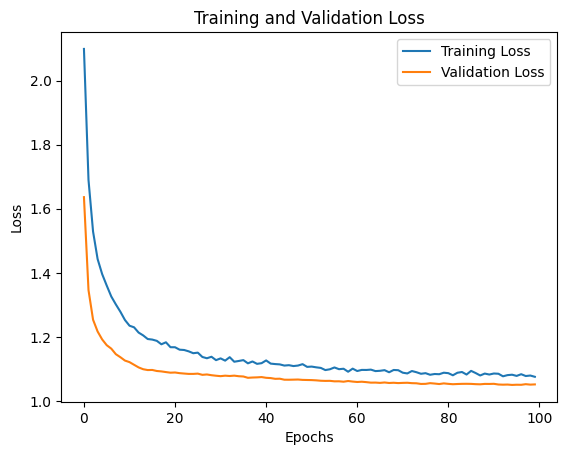

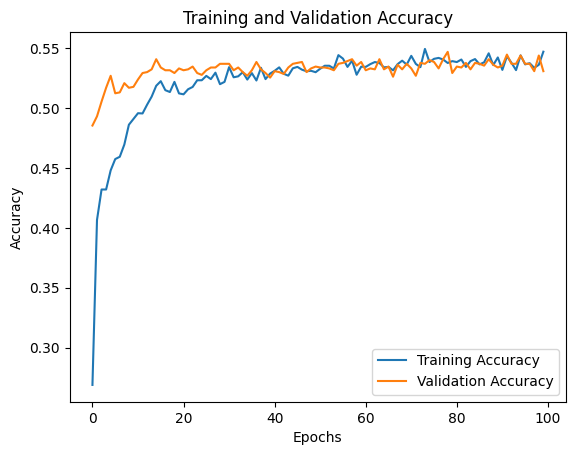

In [121]:
# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

## Final Model Approach

After tryning out multiple model approaches, I have come tho the conclusing that I need to adjsut my data and predictions inorder to improve my model predictions. I will now focus on adapting my approach to create my final official model

In [129]:
# simplify the labels to be into 3 categories
def categorize_quality(y):
    return np.select(
        [y <= 3, (y >= 4) & (y <= 7), y >= 8],  # Conditions
        [0, 1, 2]  # 0: Bad, 1: Ok, 2: Good
    )

# Apply the categorization to y
y_categorized = categorize_quality(y)

In [130]:
y_encoded = to_categorical(y_categorized)

In [131]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))  

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Accuracy: {test_accuracy:.4f}')

Epoch 1/50


/opt/homebrew/Cellar/jupyterlab/4.1.6_1/libexec/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.5424 - loss: 0.8861 - val_accuracy: 0.9669 - val_loss: 0.1898
Epoch 2/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - accuracy: 0.9642 - loss: 0.1890 - val_accuracy: 0.9669 - val_loss: 0.1693
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - accuracy: 0.9628 - loss: 0.1724 - val_accuracy: 0.9669 - val_loss: 0.1602
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - accuracy: 0.9662 - loss: 0.1575 - val_accuracy: 0.9669 - val_loss: 0.1557
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - accuracy: 0.9704 - loss: 0.1348 - val_accuracy: 0.9669 - val_loss: 0.1522
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - accuracy: 0.9647 - loss: 0.1461 - val_accuracy: 0.9669 - val_loss: 0.1494
Epoch 7/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - accuracy: 0.9624 - loss: 0.1576 - val_accuracy: 0.9669 - val_loss: 0.1478
Epoch 8/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - accuracy: 0.9634 - loss: 0.1498 - val_accurac

## Plot Visuals

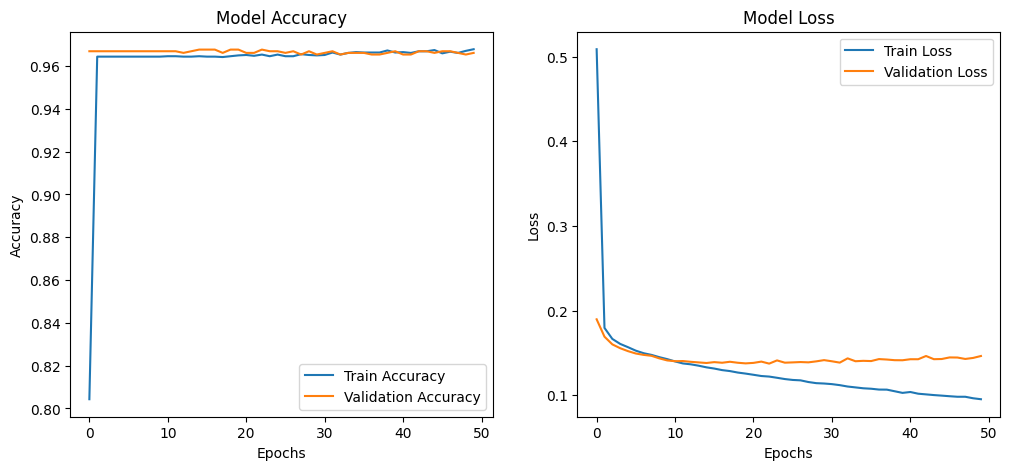

In [132]:
# Plot training & validation accuracy and loss
def plot_training_history(history):
    # Accuracy
    plt.figure(figsize=(12, 5))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='best')
    
    plt.show()


plot_training_history(history)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step


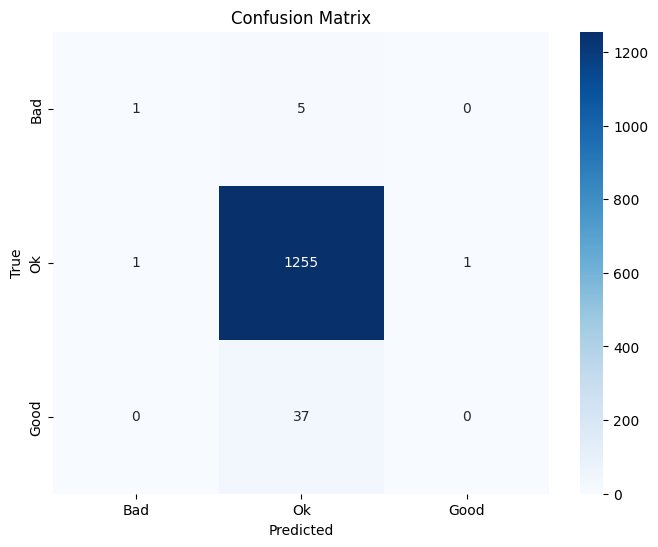

In [134]:
from sklearn.metrics import confusion_matrix
# Get predictions for test data
y_pred_test = model.predict(X_test_scaled)
y_pred_test_classes = y_pred_test.argmax(axis=1)
y_true_test_classes = y_test.argmax(axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true_test_classes, y_pred_test_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Ok', 'Good'], yticklabels=['Bad', 'Ok', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

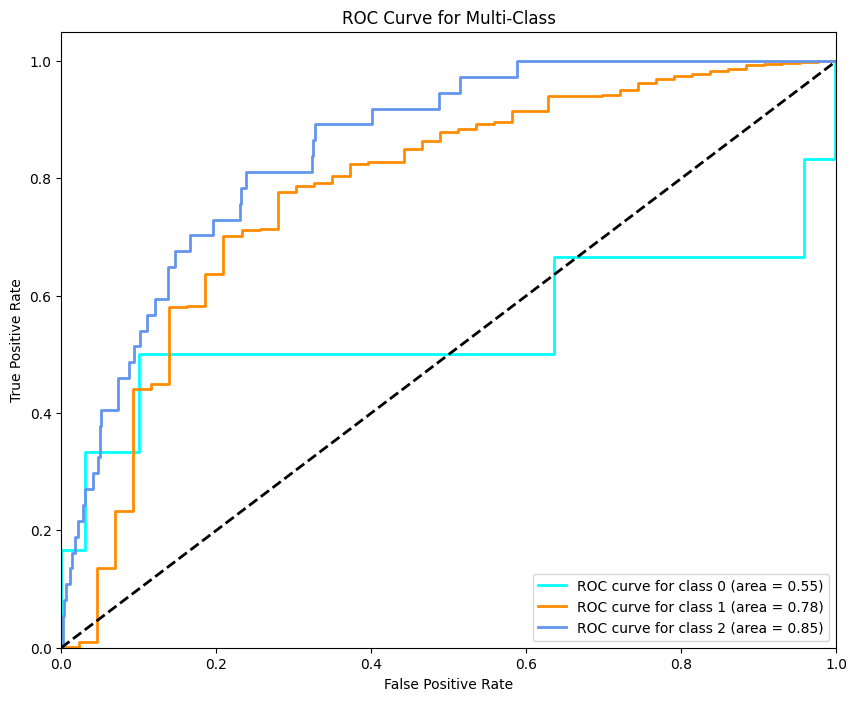

In [135]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize the output labels for ROC curve
y_test_bin = label_binarize(y_true_test_classes, classes=[0, 1, 2]) 
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class')
plt.legend(loc="lower right")
plt.show()

## Class Imbalance

After visualizing the results, we can see that accuracy is a poor choice due the class imbalances. To overcome this we will icorporate class weighting.

In [136]:
from sklearn.utils import class_weight

# Calculate class weights based on the labels
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train.argmax(axis=1)), y=y_train.argmax(axis=1))
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Train the model with class weights
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), class_weight=class_weights_dict)

Epoch 1/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.7229 - loss: 1.2962 - val_accuracy: 0.7546 - val_loss: 0.6006
Epoch 2/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - accuracy: 0.7307 - loss: 0.4740 - val_accuracy: 0.7331 - val_loss: 0.6285
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - accuracy: 0.7324 - loss: 0.4455 - val_accuracy: 0.7323 - val_loss: 0.6109
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - accuracy: 0.7690 - loss: 0.3875 - val_accuracy: 0.7300 - val_loss: 0.6343
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - accuracy: 0.7698 - loss: 0.3240 - val_accuracy: 0.7015 - val_loss: 0.6873
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - accuracy: 0.7659 - loss: 0.3120 - val_accuracy: 0.7008 - val_loss: 0.6525
Epoch 7/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.7362 - loss: 0.3406 - val_accuracy: 0.7508 - val_loss: 0.5762
Epoch 8/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - accuracy: 0.7349 - loss: 0.4123 - 

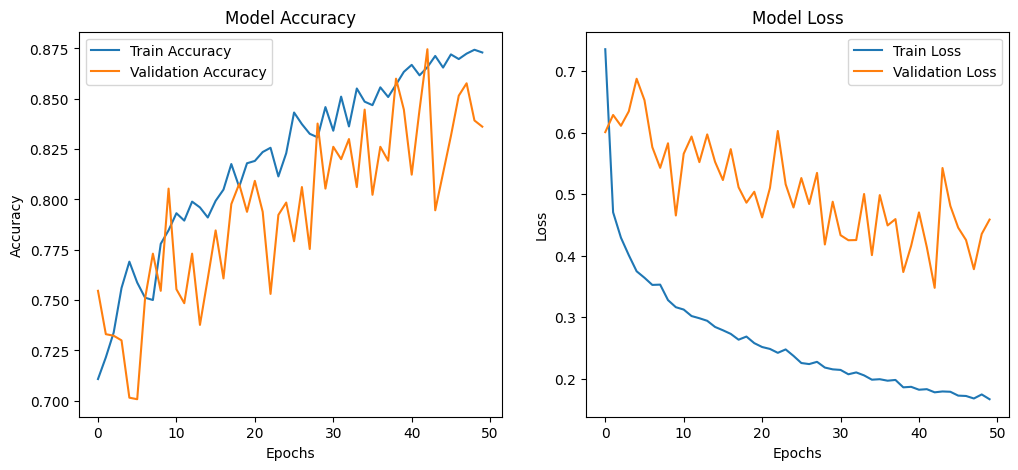

In [137]:
plot_training_history(history)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step


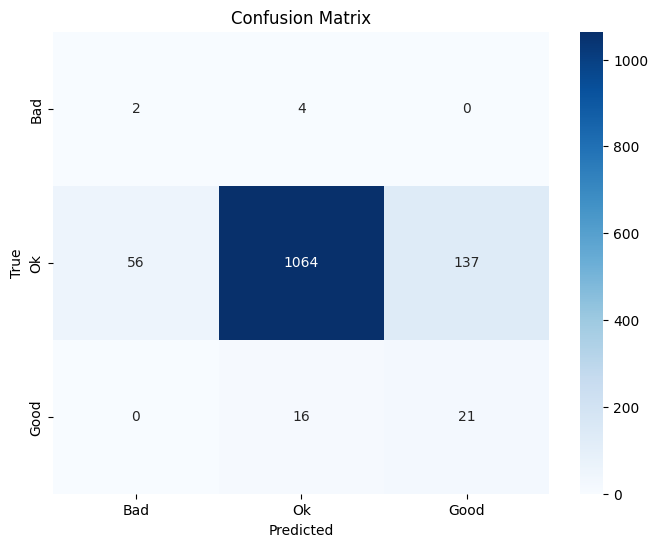

In [138]:
y_pred_test = model.predict(X_test_scaled)
y_pred_test_classes = y_pred_test.argmax(axis=1)
y_true_test_classes = y_test.argmax(axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true_test_classes, y_pred_test_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Ok', 'Good'], yticklabels=['Bad', 'Ok', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The overall accuracy is down, but this confusion matrix shows we we able to predic many more of the good wines than before!